In [46]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Payoff Profile

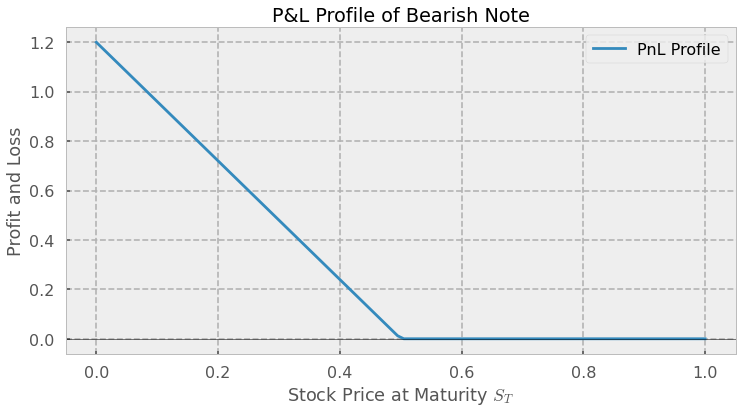

In [47]:
N = 1
S0 = 0.5   
beta = 1.2 
T = 0.5  
S_T = np.linspace(0, 1, 100) 
payoff = N * (1 + beta * np.maximum(1 - S_T / S0, 0))
PnL = payoff - N

plt.style.use('seaborn-poster')
plt.figure(figsize=(12, 6))
plt.plot(S_T, PnL, label="PnL Profile")
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel("Stock Price at Maturity $S_T$")
plt.ylabel("Profit and Loss")
plt.title("P&L Profile of Bearish Note")
plt.legend()
plt.show()

## Valuation and Sensitivities under Black-Scholes model

In [48]:
class BearishNotePricer:
    def __init__(self, N, S0, beta, r, T, sigma):
        self.N = N
        self.S0 = S0
        self.beta = beta
        self.r = r
        self.T = T
        self.sigma = sigma

    def price(self):
        d1 = (self.r + 0.5 * self.sigma**2) * self.T / (self.sigma * np.sqrt(self.T))
        return self.N * np.exp(-self.r * self.T) + (self.N * self.beta / self.S0) * (
            self.S0 * norm.cdf(-d1) - self.S0 * np.exp(-self.r * self.T) * norm.cdf(-d1 + self.sigma * np.sqrt(self.T))
        )

    def delta(self, S0=None):
        S0 = S0 if S0 is not None else self.S0
        d1 = (self.r + 0.5 * self.sigma**2) * self.T / (self.sigma * np.sqrt(self.T))
        return -(self.N * self.beta / S0) * norm.cdf(-d1)

    def gamma(self, S0=None):
        S0 = S0 if S0 is not None else self.S0
        d1 = (self.r + 0.5 * self.sigma**2) * self.T / (self.sigma * np.sqrt(self.T))
        return (self.N * self.beta / S0) * (norm.pdf(d1) / (S0 * self.sigma * np.sqrt(self.T)))

    def vega(self):
        d1 = (self.r + 0.5 * self.sigma**2) * self.T / (self.sigma * np.sqrt(self.T))
        return (self.N * self.beta / self.S0) * (self.S0 * np.sqrt(self.T) * norm.pdf(d1))

### Subsection 1

In [49]:
N = 1
S0 = 0.55
beta = 1.2
r = 0.05
T = 0.25
sigma = 0.2

pricer = BearishNotePricer(N=N, S0=S0, beta=beta, r=r, T=T, sigma=sigma)
note_price = pricer.price()
note_delta = pricer.delta()
note_gamma = pricer.gamma()
note_vega = pricer.vega()

print("The value of the bearish note is:", note_price)
print("The delta of the bearish note is:", note_delta)
print("The gamma of the bearish note is:", note_gamma)
print("The vega of the bearish note is:", note_vega)

The value of the bearish note is: 0.9471044743459893
The delta of the bearish note is: -0.9393596002741664
The gamma of the bearish note is: 15.585322688821657
The vega of the bearish note is: 0.23572800566842758


### Subsection 2

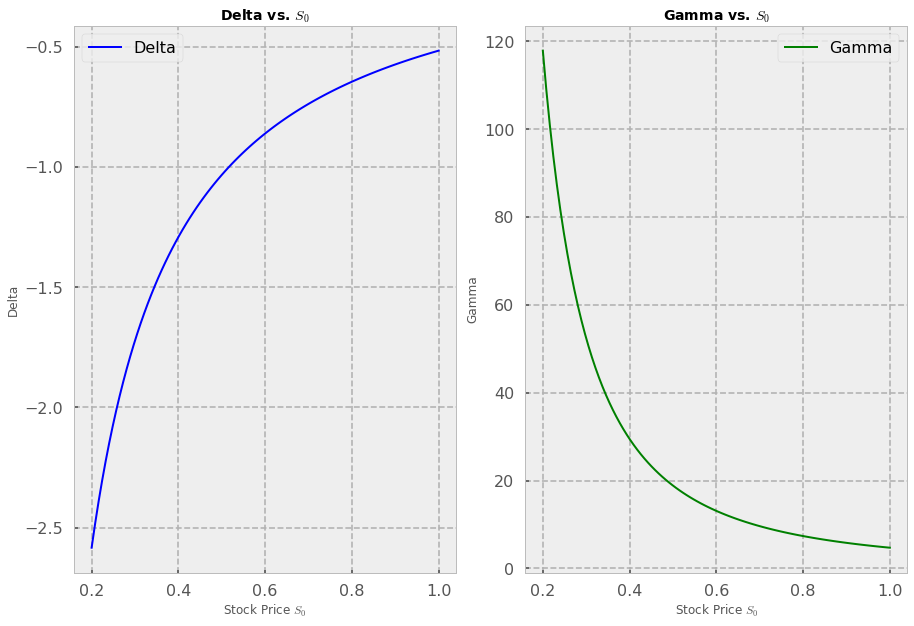

In [50]:
S0_range = np.linspace(0.2, 1, 100)

deltas = [pricer.delta(S0) for S0 in S0_range]
gammas = [pricer.gamma(S0) for S0 in S0_range]

plt.subplot(1, 2, 1)
plt.plot(S0_range, deltas, label="Delta", color="blue", linewidth=2)
plt.xlabel("Stock Price $S_0$", fontsize=12)
plt.ylabel("Delta", fontsize=12)
plt.title("Delta vs. $S_0$", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(S0_range, gammas, label="Gamma", color="green", linewidth=2)
plt.xlabel("Stock Price $S_0$", fontsize=12)
plt.ylabel("Gamma", fontsize=12)
plt.title("Gamma vs. $S_0$", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()